## To-Do list 
- [ ] Sumatorio fuerzas
- [x] Direcciones principales
- [ ] 

Modelización del material 

$\text{Ramberg-Osgood equation:} \hspace{41mm} \varepsilon_{tot} = \underbrace{\frac{\sigma}{E}}_{\text{elastic}} + \underbrace{\left(\frac{\sigma}{K}\right)^{\frac{1}{n}}}_{\text{plastic}}$

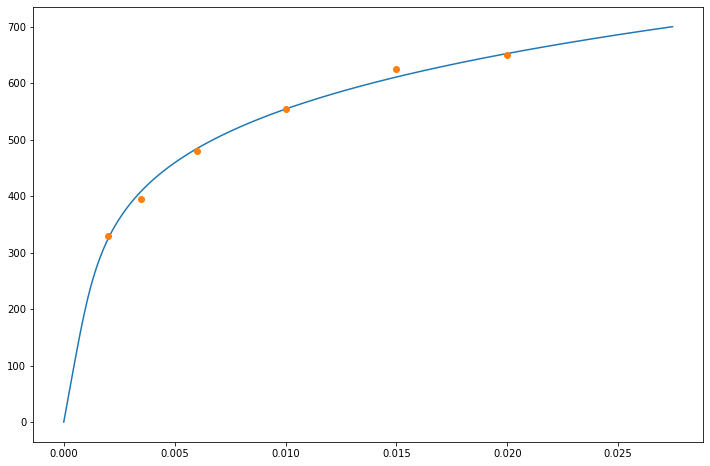

In [9]:
import numpy as np
import matplotlib.pyplot as plt

E=216000
K = 1462.45
n = 0.198

strain_data = [0.02, 0.015, 0.01, 0.006, 0.0035, 0.002]
stress_data = [650, 625, 555, 480, 395, 330]

Stress = np.linspace(0,700,100)
Strain = Stress/E+(Stress/K)**(1/n)

f, ax = plt.subplots(figsize=(12,8))
ax.plot(Strain,Stress)
ax.plot(strain_data,stress_data,'o')
plt.show()

Obtencion de coeficientes mediante optimización

Los paráemtros son :
k: 1465.10
n: 0.20


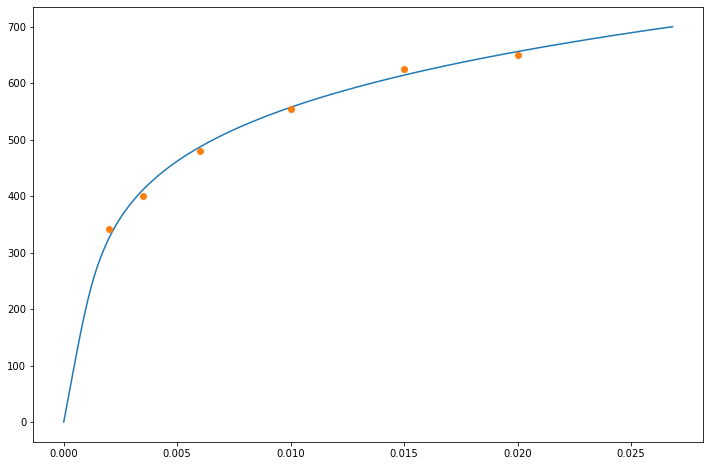

In [10]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.optimize import minimize

E=216000
Stress = np.linspace(0,700,100)
strain_data = np.array([0.02, 0.015, 0.01, 0.006, 0.0035, 0.002])
stress_data = np.array([650, 625, 555, 480, 400, 342])

# parameters to know
fun = lambda param: stress_data/E+(stress_data/param[0])**(1/param[1])
Obj_fun = lambda x: sum((strain_data-fun([x[0],x[1]]))**2)

# optimization
bnds = ((1000,2000),(0.1,0.25))
res = minimize(Obj_fun, (1500,0.15), method='TNC', bounds=bnds, tol=1e-10)

print(f'Los paráemtros son :\nk: {res.x[0]:.2f}\nn: {res.x[1]:.2f}')

Stress = np.linspace(0,700,100)
fun = lambda param: Stress/E+(Stress/param[0])**(1/param[1])

f, ax = plt.subplots(figsize=(12,8))
ax.plot(fun([res.x[0],res.x[1]]),Stress)
ax.plot(strain_data,stress_data,'o')
plt.show()


## Tensión de Von mises
$$\sigma_{VM}=\sqrt{\frac{(\sigma_1-\sigma_2)^2+(\sigma_2-\sigma_3)^2+(\sigma_3-\sigma_1)^2}{2}}$$

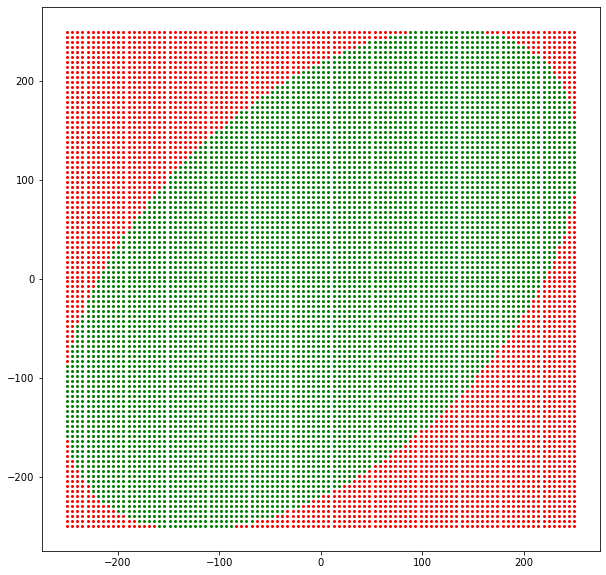

In [14]:
SS1 = np.linspace(-250,250,100)
SS2 = np.linspace(-250,250,100)

f, ax = plt.subplots(figsize=(10,10))

for i in SS1:
    for j in SS2:
        VM = np.sqrt(((i-j)**2+(i)**2+(j)**2)*0.5)
        if VM > 220:
            ax.plot(i,j,'or',markersize=2)
        else:
            ax.plot(i,j,'og',markersize=2)

plt.show()

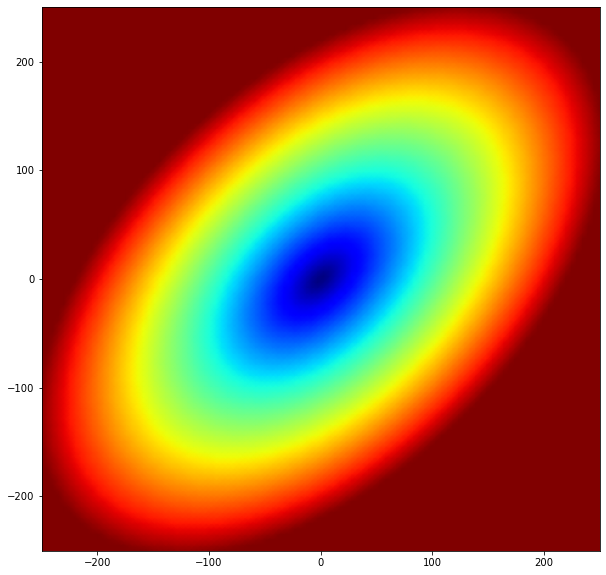

In [30]:
VM = lambda S11,S22: np.sqrt(((S11-S22)**2+(S11)**2+(S22)**2)*0.5)

S11 = np.linspace(-250,250,100)
S22 = np.linspace(-250,250,100)
xv, yv = np.meshgrid(S11,S22)
f, ax  = plt.subplots(figsize=(10,10))

c = ax.pcolormesh(xv, yv, VM(xv,yv),shading='gouraud',cmap='jet',vmax=220)#vmax=0.000002

plt.show()

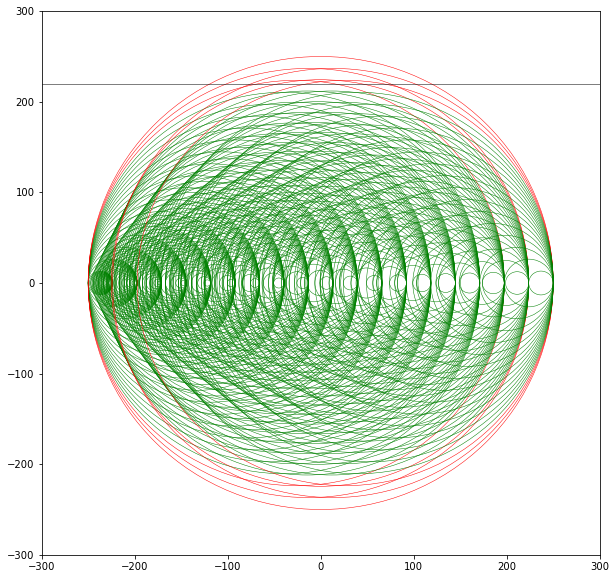

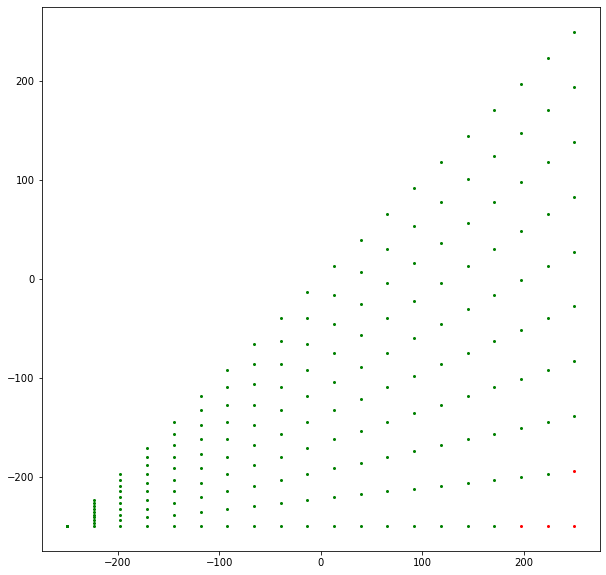

In [10]:
import numpy as np
import matplotlib.pyplot as plt

S11 = np.linspace(-250,250,20)

f, ax = plt.subplots(figsize=(10,10))
for S_11 in S11:
    S33 = np.linspace(-250,S_11,20)
    for S_33 in S33:
        r = 0.5*(S_11-S_33)
        if r < 220:
            ax.add_patch(plt.Circle((0.5*(S_11+S_33), 0 ), r ,fill = False,linewidth=.5,color='green'))
        else:
            ax.add_patch(plt.Circle((0.5*(S_11+S_33), 0 ), r ,fill = False,linewidth=.5,color='red'))
    
plt.axhline(y=220,color='black',linewidth=0.5)

ax.axis([-300,300,-300,300])

f, ax = plt.subplots(figsize=(10,10))
for S_11 in S11:
    S33 = np.linspace(-250,S_11,10)
    for S_33 in S33:
        r = 0.5*(S_11-S_33)
        if r < 220:
            ax.plot(S_11,S_33,'o',color='green',markersize=2)
        else:
            ax.plot(S_11,S_33,'o',color='red',markersize=2)

plt.show()
                    


## Criterio de Tresca
$$ \frac{1}{2}(\sigma_1-\sigma_3)\le \sigma_y$$

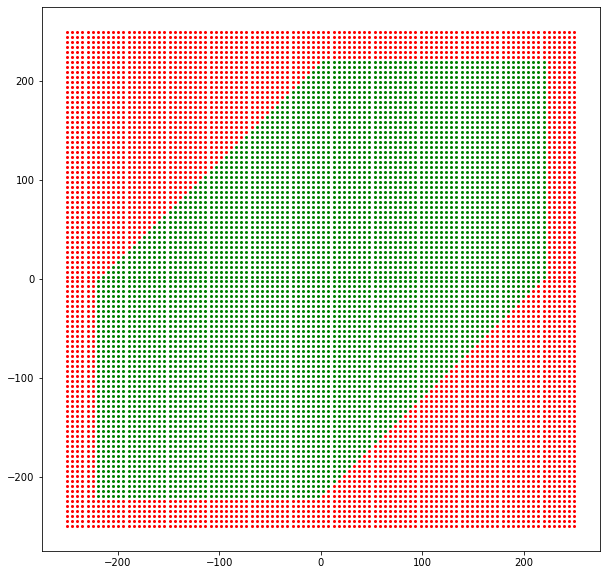

In [15]:
SS1 = np.linspace(-250,250,100)
SS3 = np.linspace(-250,250,100)

f, ax = plt.subplots(figsize=(10,10))

for i in SS1:
    for j in SS3:
        Tresca = max(abs(i-j),abs(i),abs(j))
        if Tresca > 220:
            ax.plot(i,j,'or',markersize=2)
        else:
            ax.plot(i,j,'og',markersize=2)

plt.show()

In [14]:
import numpy as np
estado_tensional = np.array([[50,30],[30,-20]])
from numpy import linalg as LA
w, v = LA.eig(estado_tensional)
print('valores propios')
print(w)
print('vecotres propios')
print(v)
vector_1 = v[:,0]
vector_2 = v[:,1]

angle1 = np.arccos(np.dot(vector_1, [1, 0]))
angle2 = np.arccos(np.dot(vector_2, [1, 0]))
print('angulos')
print(np.degrees(angle1))
print(np.degrees(angle2))

valores propios
[ 61.09772229 -31.09772229]
vecotres propios
[[ 0.93788501 -0.34694625]
 [ 0.34694625  0.93788501]]
angulos
20.300647322502233
110.30064732250224


In [3]:
sigma_x = estado_tensional[0,0]
sigma_y = estado_tensional[1,1]
cortante = estado_tensional[0,1]

In [4]:
R = np.sqrt(((sigma_x-sigma_y)*0.5)**2+cortante**2)
(sigma_x+sigma_y)*0.5+R

61.09772228646444

In [5]:
(sigma_x+sigma_y)*0.5-R

-31.09772228646444

Para rotar un tensor de rango 2:

$\sigma'=Q\cdot\sigma\cdot Q^T$

Siendo la matriz de rotación:

$${\bf Q} = 
\left[  \matrix {\;\;\;\cos \theta & \sin \theta \\
                -\sin \theta & \cos \theta} \right]$$

In [6]:
matrtiz_R = np.array([[np.cos(angle1),np.sin(angle1)],[-np.sin(angle1),np.cos(angle1)]])

In [7]:
resultado = np.dot(np.dot(matrtiz_R,estado_tensional),matrtiz_R.T)
resultado.round(2)

array([[ 61.1,   0. ],
       [  0. , -31.1]])

In [8]:
print(f'La tension máxima principal es: {resultado[0,0]:.2f}')
print(f'La tension mínima principal es: {resultado[1,1]:.2f}')

La tension máxima principal es: 61.10
La tension mínima principal es: -31.10


Joder menudo cristo ..
 
$\boldsymbol{\sigma} = 
\left[ \matrix{
\sigma_{11} & \sigma_{12} \\
\sigma_{21} & \sigma_{22} }
\right]
=
\left[ \matrix{
\sigma_{xx} & \tau_{xy} \\
\tau_{yx} & \sigma_{yy} }
\right]$


Tensor de tensiones multiaxial 

$\boldsymbol{\sigma} = 
\left[ \matrix{
\sigma_{11} & \sigma_{12} & \sigma_{13} \\
\sigma_{21} & \sigma_{22} & \sigma_{23} \\
\sigma_{31} & \sigma_{32} & \sigma_{33} }
\right]
=
\left[ \matrix{
\sigma_{xx} & \tau_{xy} & \tau_{xz} \\
\tau_{yx} & \sigma_{yy} & \tau_{yz} \\
\tau_{zx} & \tau_{zy} & \sigma_{zz} }
\right]$

## Stress invariants

## Principal Stresses and direccions
* Eigenvalues of the stress tensor -> Principal Stresses
* Eigenvectors of the stress tensor -> Principal Planes

In [1]:
import numpy as np
S_xx = 40
S_yy = 10
S_zz = -10
S_xy = S_xy = 20
S_zx = S_zx = 30
S_yz = S_yz = -15

S = np.array([ [S_xx, S_xy, S_zx],
               [S_xy, S_yy, S_yz],
               [S_zx, S_yz, S_zz] ])
S

array([[ 40,  20,  30],
       [ 20,  10, -15],
       [ 30, -15, -10]])

In [5]:
print(np.trace(S))

40


In [130]:
S11_S22_S33, Prin_Dir = np.linalg.eig(S)
S11_S22_S33

array([-35.20492825,  57.38531541,  17.81961284])

In [131]:
S11, S22, S33 = np.sort(S11_S22_S33)[::-1]
print(S11, S22, S33)
np.round(Prin_Dir,2)


57.38531540976693 17.819612844552985 -35.204928254319896


array([[-0.43,  0.9 ,  0.06],
       [ 0.45,  0.27, -0.85],
       [ 0.78,  0.34,  0.52]])

In [132]:
print(Prin_Dir[:,0] @ Prin_Dir[:,1])
print(np.dot(Prin_Dir[:,0], Prin_Dir[:,1]))

-3.3306690738754696e-16
-3.3306690738754696e-16


In [133]:
print(np.linalg.norm(Prin_Dir[:,0]))

1.0


In [134]:
e_val_l = e_val.tolist()
p1_index, p2_index, p3_index = e_val_l.index(S11), e_val_l.index(S22), e_val_l.index(S33)
p1_vec, p2_vec, p3_vec = e_vec[:,p1_index], e_vec[:,p2_index], e_vec[:,p3_index]
print(p1_index, p2_index, p3_index)
print(p1_vec, p2_vec, p3_vec)

1 2 0
[0.90010949 0.27224181 0.34012837] [ 0.05963651 -0.85035842  0.52281359] [-0.43156274  0.4503054   0.78165123]


In [138]:
S_rotado = np.round(np.dot(Prin_Dir.T,np.dot(S,Prin_Dir)),2)
print(S_rotado)

[[-35.2    0.    -0.  ]
 [  0.    57.39   0.  ]
 [ -0.     0.    17.82]]


In [139]:
print(np.trace(S_rotado))

40.01


## Rotacion de tensor tensiones (2D |3D)
$\sigma'=Q\cdot\sigma\cdot Q^T$

2D -> Rotación antihoraria con $\theta$ positivo

In [20]:
S = np.array([[1,2],[2,3]])
S

array([[1, 2],
       [2, 3]])

In [30]:
angle = np.radians(50)
Q = np.array([[np.cos(angle),np.sin(angle)],[-np.sin(angle),np.cos(angle)]])

In [31]:
S_ = np.dot(np.dot(Q,S),Q.T)
S_

array([[ 4.14326368,  0.6375114 ],
       [ 0.6375114 , -0.14326368]])

3D

In [25]:
import sympy as sym

In [36]:
S11 = sym.symbols('S11')
S22 = sym.symbols('S22')
S33 = sym.symbols('S33')
S12 = sym.symbols('S12')
S13 = sym.symbols('S13')
S23 = sym.symbols('S23')
lamb = sym.symbols('lambda')

In [37]:
print((S11-lamb)*(S22-lamb))

(S11 - lambda)*(S22 - lambda)


In [38]:
sym.expand((S11-lamb)*(S22-lamb))

S11*S22 - S11*lambda - S22*lambda + lambda**2

In [39]:
sym.expand((S11-lamb)*(S22-lamb)*(S33-lamb))

S11*S22*S33 - S11*S22*lambda - S11*S33*lambda + S11*lambda**2 - S22*S33*lambda + S22*lambda**2 + S33*lambda**2 - lambda**3

In [41]:
polinomio = sym.expand((S11-lamb)*(S22-lamb)*(S33-lamb)+2*S12*S13*S23-(S22-lamb)*S13**2-(S33-lamb)*S12**2-(S11-lamb)*S23**2)

In [42]:
polinomio

S11*S22*S33 - S11*S22*lambda - S11*S23**2 - S11*S33*lambda + S11*lambda**2 - S12**2*S33 + S12**2*lambda + 2*S12*S13*S23 - S13**2*S22 + S13**2*lambda - S22*S33*lambda + S22*lambda**2 + S23**2*lambda + S33*lambda**2 - lambda**3

In [48]:
x = sym.Symbol('x')
y = sym.Symbol('y')
expr = x+y

In [49]:
expr.subs([(x, 2), (y, 4)])

6